In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.neighbors import NearestNeighbors

%matplotlib inline

In [2]:
df = pd.read_csv('features.csv')
df.head()

,shoe_number,0,1,2,3,4,5,6,7,8,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,1,0.0,0.0,0.0,0.000000,0.0,0.000000,0.010008,0.000000,0.0,...,1.399329,0.0,0.0,3.729317,1.103814,4.129386,0.701350,0.000000,0.0,0.000000
1,2,0.0,0.0,0.0,4.031225,0.0,0.218872,2.062329,0.353586,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.152950,0.000000,0.000000,0.0,0.451184
2,3,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.275667,0.000000,1.033908,0.000000,0.769665,0.0,0.000000
3,4,0.0,0.0,0.0,2.478184,0.0,0.000000,3.674074,0.000000,0.0,...,0.125413,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
4,5,0.0,0.0,0.0,0.000000,0.0,0.810305,1.475269,0.000000,0.0,...,0.000000,0.0,0.0,4.608068,3.596823,5.110212,0.163423,0.023230,0.0,0.000000


In [3]:
df.set_index('shoe_number',inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
shoe_number,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.000000,0.0,0.000000,0.010008,0.000000,0.0,2.526172,...,1.399329,0.0,0.0,3.729317,1.103814,4.129386,0.701350,0.000000,0.0,0.000000
2,0.0,0.0,0.0,4.031225,0.0,0.218872,2.062329,0.353586,0.0,4.204300,...,0.000000,0.0,0.0,0.000000,0.000000,0.152950,0.000000,0.000000,0.0,0.451184
3,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.356971,...,0.000000,0.0,0.0,0.275667,0.000000,1.033908,0.000000,0.769665,0.0,0.000000
4,0.0,0.0,0.0,2.478184,0.0,0.000000,3.674074,0.000000,0.0,0.792082,...,0.125413,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
5,0.0,0.0,0.0,0.000000,0.0,0.810305,1.475269,0.000000,0.0,2.662915,...,0.000000,0.0,0.0,4.608068,3.596823,5.110212,0.163423,0.023230,0.0,0.000000


In [4]:
def plot_shoes(indices):
    plt.figure(figsize=[10,10])

    plt.subplot(2,2,1)
    im = mpimg.imread('ZapposShoes/Images/'+str(indices[0][0])+'.jpg')
    plt.imshow(im)
    plt.title('Original - '+ str(indices[0][0]))
    plt.axis('off')

    plt.subplot(2,2,2)
    im = mpimg.imread('ZapposShoes/Images/'+str(indices[0][1])+'.jpg')
    plt.imshow(im);
    plt.title('Recommendation 1 - '+ str(indices[0][1]))
    plt.axis('off')

    plt.subplot(2,2,3)
    im = mpimg.imread('ZapposShoes/Images/'+str(indices[0][2])+'.jpg')
    plt.imshow(im);
    plt.title('Recommendation 2 - '+ str(indices[0][2]))
    plt.axis('off')

    plt.subplot(2,2,4)
    im = mpimg.imread('ZapposShoes/Images/'+str(indices[0][3])+'.jpg')
    plt.imshow(im);
    plt.title('Recommendation 3 - '+ str(indices[0][3]))
    plt.axis('off');

Define a KNN of 4

In [12]:
eucl = NearestNeighbors(n_neighbors=4,metric='euclidean').fit(df)
manh = NearestNeighbors(n_neighbors=4,metric='cityblock').fit(df)
cosi = NearestNeighbors(n_neighbors=4,metric='cosine',algorithm='brute').fit(df)
NearestNeighbors?

In [13]:
sample = 0 # index of row

Finds the distance and index of the newrest neighbors.  Note that the first neighbor is itself.

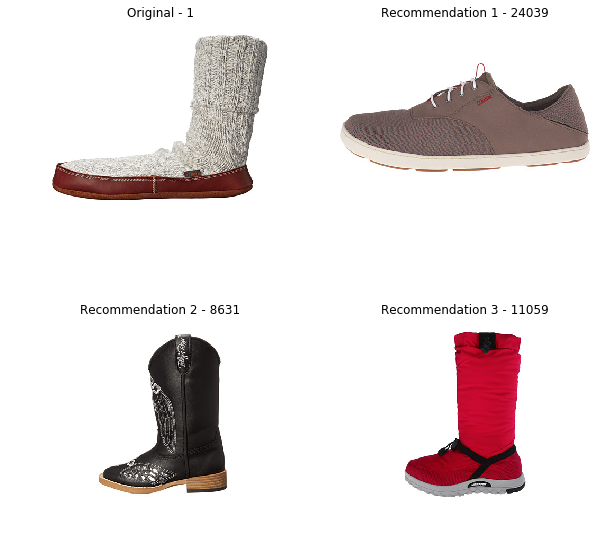

In [14]:
distances, indices = eucl.kneighbors(df.iloc[sample].values.reshape(1,-1))
indices = indices+1
indices
plot_shoes(indices)

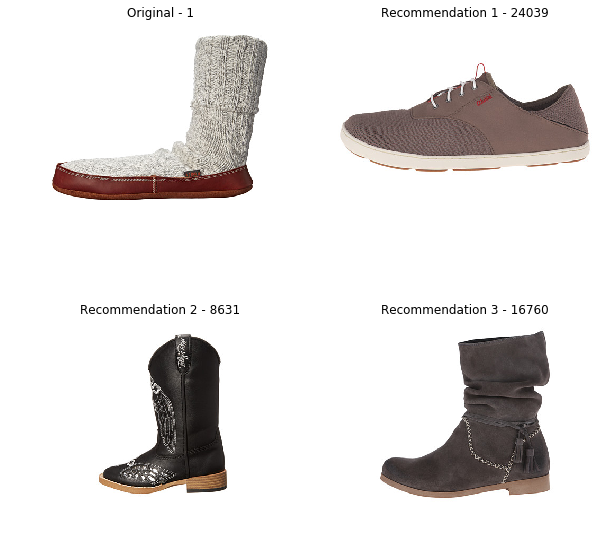

In [15]:
distances, indices = manh.kneighbors(df.iloc[sample].values.reshape(1,-1))
indices = indices+1
indices
plot_shoes(indices)

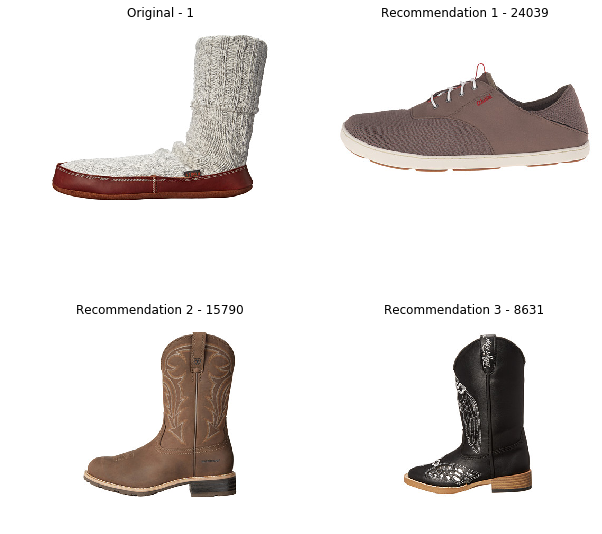

In [16]:
distances, indices = cosi.kneighbors(df.iloc[sample].values.reshape(1,-1))
indices = indices+1
indices
plot_shoes(indices)